In [1]:
## Import packages required for the project
import pandas as pd
import numpy as np

import datetime as dt
import seaborn as sns

In [2]:
## Import the two sheets of the excel file, and concatenate them into one dataframe
## PLEASE CHANGE FILE LOCATION ACCORDINGLY
excel_location = r"C:\Users\ksbha\Documents\Python Scripts\DS4A\DS\online_retail_II.xlsx"
data = pd.read_excel(excel_location)
data2 = pd.read_excel(excel_location, sheet_name="Year 2010-2011")

data = pd.concat([data, data2])

In [3]:
## Sanity check to see if the data is imported correctly
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
##Reset the indices of our dataframe
data.reset_index(inplace=True)

In [5]:
## Analyzing the cancellations orders
data_cancellations = data[data['Invoice'].str.contains('C', na=False)]

In [6]:
data_cancellations.head()

,index,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


Cancellations show up as negative quantities in the Quantity column. I have chosen not to remove them from the dataframe as they will help us understand which customers are more likely to cancel orders.

In [7]:
## Not only should we remove the cancellations- we should also get rid of the original orders, because they yielded no revenue
# data = data[data['Invoice'].str.contains('C', na=False) == False]
# data_cancelled_order = data_cancellations.drop(['Invoice', 'index', 'InvoiceDate'], axis=1)
# data_cancelled_order.Quantity = data_cancelled_order.Quantity * -1
# data_cancelled_order
# data = data.merge(data_cancelled_order, how='left', indicator=True)
# data = data[data['_merge'] == 'left_only']
# data = data.drop(['_merge'], axis=1)

Since we want to analyze the customers, we should remove any transacitons that are not customer-related. 
One such transaction is those with a negative Price, which are included to adjust for "bad debt"

In [8]:
data[data.Price < 0]

,index,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
825444,299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
825445,299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [9]:
data_bad_debt = data[data.Price < 0]

Also going to remove items that are returned, as they do not provide any insights on customer behaviour

In [10]:
# data_non_cancellations = data[data['Invoice'].str.contains('C', na=False) == False]
data_returned = data[(data.Quantity < 0) & (data['Invoice'].str.contains('C', na=False) == False)]

In [11]:
data_returned

,index,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,NaN,United Kingdom
283,283,489463,71477,short,-240,2009-12-01 10:52:00,0.0,NaN,United Kingdom
284,284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.0,NaN,United Kingdom
470,470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...,...
1060794,535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
1060796,535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
1060797,535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
1062371,536910,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


In [12]:
##  Remove indices of data_cancellations, data_bad_debt, data_returned from data
# data.drop(data_cancellations.index, inplace=True)
data.drop(data_bad_debt.index, inplace=True)
data.drop(data_returned.index, inplace=True)

In [13]:
## Make everything in the 'StockCode' column uppercase
data['StockCode'] = data['StockCode'].str.upper()

In [14]:
## Remove whitespace from everything in the 'StockCode' column
data['StockCode'] = data['StockCode'].str.strip()

Items with no Price don't add any real value. These are worth removing too, since most of them don't even have a Customer ID

In [15]:
data_NoPrice = data[data['Price'] == 0.]

In [16]:
data_NoPrice.head()

,index,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
3161,3161,489659,NaN,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom
3731,3731,489781,NaN,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom
4674,4674,489825,NaN,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom
5904,5904,489861,DOT,DOTCOM POSTAGE,1,2009-12-02 14:50:00,0.0,NaN,United Kingdom
6378,6378,489882,35751C,NaN,12,2009-12-02 16:22:00,0.0,NaN,United Kingdom


In [17]:
data.drop(data_NoPrice.index, inplace=True)

Now, we can get rid of some transactions that do not add any real value to our customer segmentation analysis. This includes those with a Stock Code usch as 'Test', 'Bank', 'Amazon' or 'Gift'

In [18]:
data_test = data[data['StockCode'].str.contains('TEST', na=False)]
data.drop(data_test.index, inplace=True)

In [19]:
data_bank = data[data['StockCode'].str.contains('BANK', na=False)]
data.drop(data_bank.index, inplace=True)

In [20]:
data_amazon = data[data['StockCode'].str.contains('AMAZON', na=False)]
data.drop(data_amazon.index, inplace=True)

In [21]:
data_gift = data[data['StockCode'].str.contains('GIFT', na=False)]
data.drop(data_gift.index, inplace=True)

In [22]:
data_adjust = data[data['StockCode'].str.contains('ADJUST', na=False)]
data.drop(data_adjust.index, inplace=True)

Introduce a New column called 'TotalPrice', which will be used extensively in our analysis

In [23]:
data['TotalPrice'] = data['Quantity'] * data['Price']

In [24]:
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')
data['YearMonthWeek'] = data['InvoiceDate'].dt.to_period('W')

In [25]:
grouped_df = data.groupby('YearMonth')['TotalPrice'].sum().reset_index()

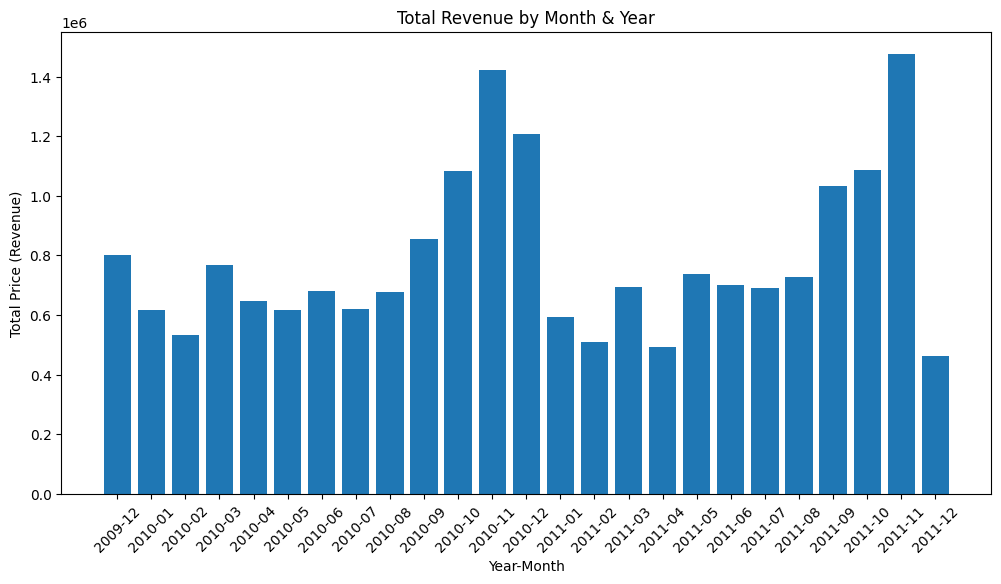

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(grouped_df['YearMonth'].astype(str), grouped_df['TotalPrice'])
plt.xlabel('Year-Month')
plt.ylabel('Total Price (Revenue)')
plt.title('Total Revenue by Month & Year')
plt.xticks(rotation=45)
plt.show()

The bar chart above demonstrates some seasonality. The number of transactions in November is significantly higher than the rest of the year. This is likely due to the Christmas season. There is limited data on the last December month in 2011, whihc is why a weekly breakdown is worth looking at

In [27]:
grouped_df = data.groupby('YearMonthWeek')['TotalPrice'].sum().reset_index()

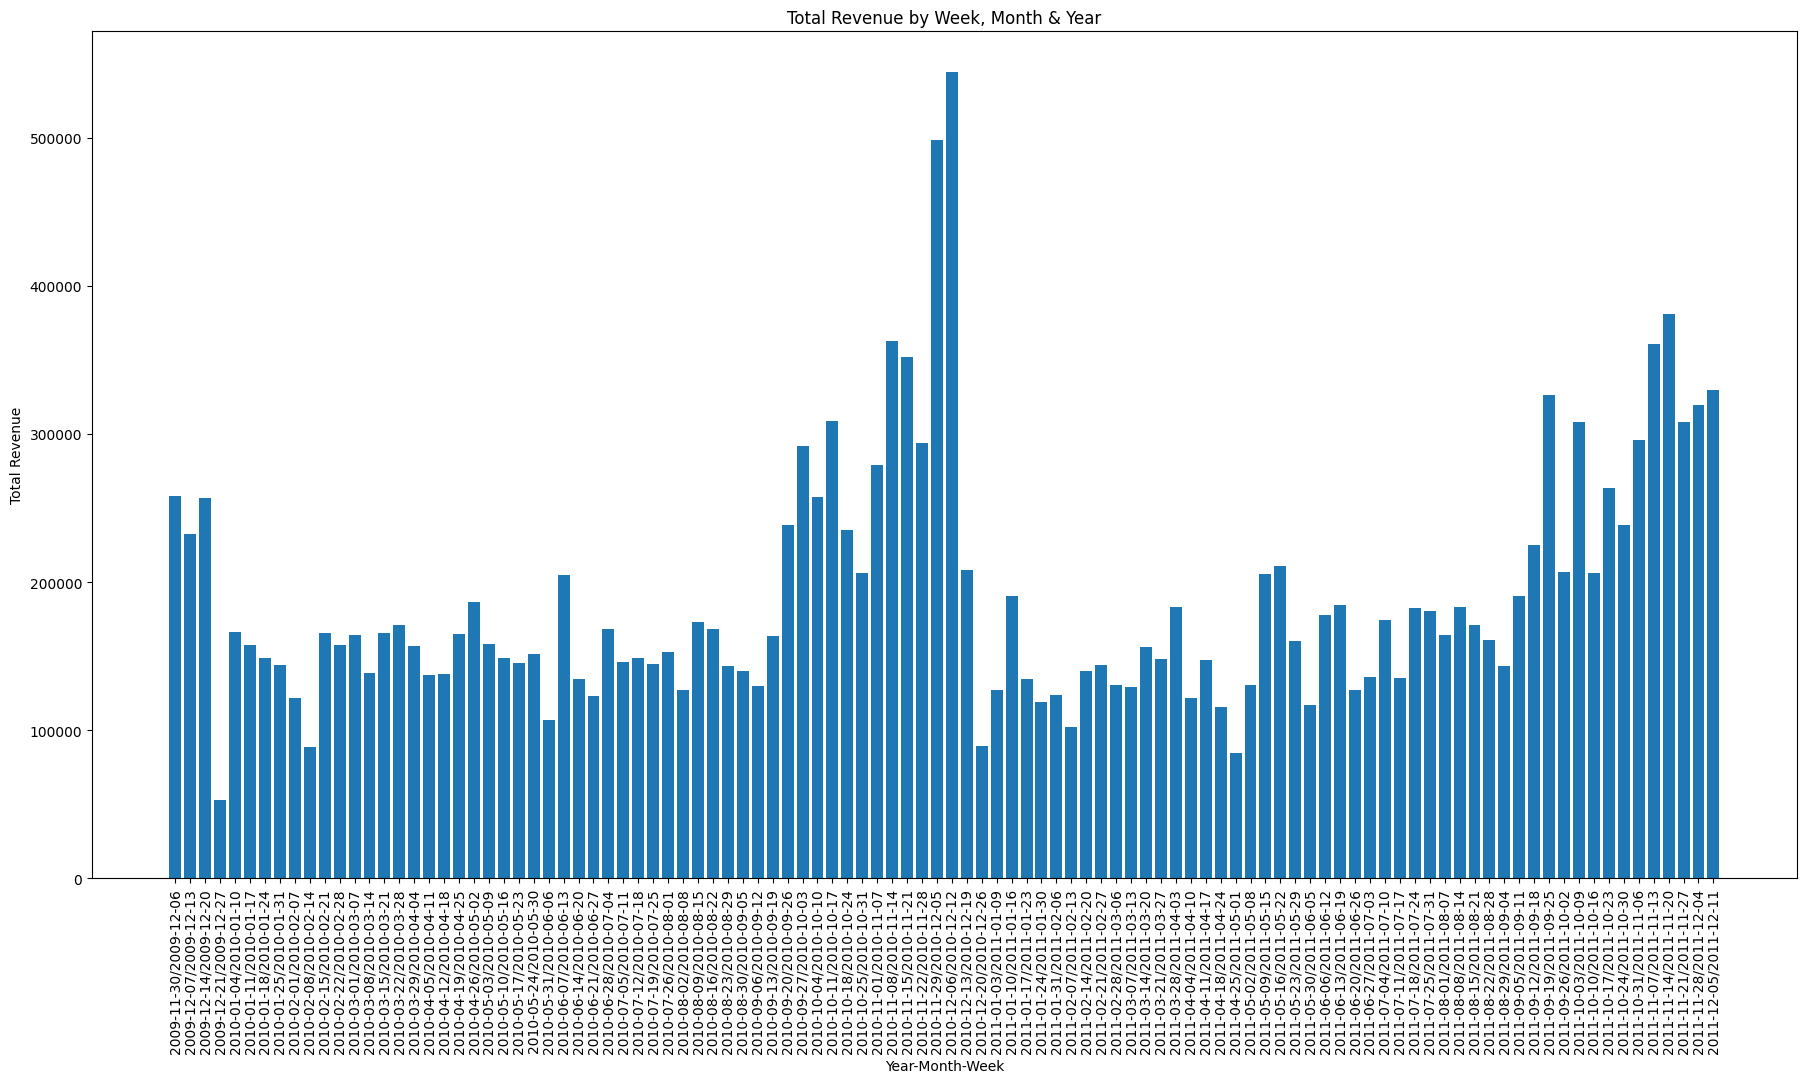

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 11))
plt.bar(grouped_df['YearMonthWeek'].astype(str), grouped_df['TotalPrice'])
plt.xlabel('Year-Month-Week')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Week, Month & Year')
plt.xticks(rotation=90)
plt.show()

In [29]:
## No duplicates as shown below
data.duplicated().sum()

0

### RFM Analysis

RFM is a very useful form of customer segmentation. As a form of feature engineering, we will rely on it quite a bit to strengthen our analysis. It consists of:
- *Recency*- When did the customer make their last purchase? Recent customers are more likely to purchase again compared to those who haven't purchased in a while.
- *Frequency*- How often do they purchase? Customers who purchase frequently are more engaged, and likely more loyal, than those who purchase rarely.
- *Monetary*- How much money do they spend? Customers who spend more are obviously more valuable to the business than those who spend less.

In [30]:
data["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [31]:
## TOday's date is set as 2 days after the max date
today_date=dt.datetime(2011,12,11)
data["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [32]:
## Group rfm by Customer ID
rfm=data.groupby("Customer ID").agg({"InvoiceDate": lambda date :(today_date-date.max()).days,
                               "Invoice": lambda nmb : nmb.nunique(),
                               "TotalPrice":lambda TotPrc : TotPrc.sum()})

In [33]:
rfm.columns=["recency","frequency","monetary"]
rfm.head()

,recency,frequency,monetary
Customer ID,,,
12346.0,326,6,-160.18
12347.0,3,8,5633.32
12348.0,76,5,2019.40
12349.0,19,5,4404.54
12350.0,311,1,334.40


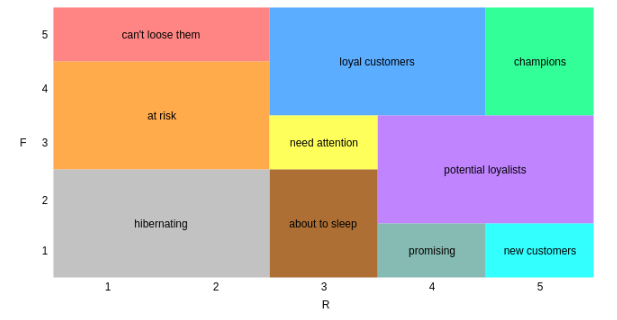

In [34]:
## Insert an image from my folders
from IPython.display import Image
Image(filename=r"C:\Users\ksbha\Pictures\AdvantagesAndInefficaciesOfRFMSegmentation1.png")

Based on the recency and frequncy scores, we will segemnt our customers as per the graph shown above.

In [35]:
rfm["recency_score"] = pd.qcut(rfm["recency"],5,labels=[5,4,3,2,1])
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"),5,labels=[1,2,3,4,5])

In [36]:
rfm["rfm_score"]=rfm["recency_score"].astype("str")+rfm["frequency_score"].astype("str")
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,rfm_score
Customer ID,,,,,,
12346.0,326,6,-160.18,2,4,24
12347.0,3,8,5633.32,5,4,54
12348.0,76,5,2019.40,3,3,33
12349.0,19,5,4404.54,5,3,53
12350.0,311,1,334.40,2,1,21


In [37]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}


rfm['segment'] = rfm['rfm_score'].replace(seg_map, regex=True)

rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,rfm_score,segment
Customer ID,,,,,,,
12346.0,326,6,-160.18,2,4,24,at_Risk
12347.0,3,8,5633.32,5,4,54,champions
12348.0,76,5,2019.40,3,3,33,need_attention
12349.0,19,5,4404.54,5,3,53,potential_loyalists
12350.0,311,1,334.40,2,1,21,hibernating


The table below shows us that most of our customers are actually hibernating. This segmentation can help marketing managers identify those who are not active and target them with special offers to re-engage them.

However, the next most frequent customers are the "loyal_customers" and the "champions". They also provide the most revenue when compared to the rest!

In [38]:
rfm[["segment","recency","frequency","monetary"]].groupby("segment").agg(["sum","mean","count"])

recency                   frequency                    
                        sum        mean count       sum       mean count   
segment                                                                    
about_to_sleep        41613  107.527132   387       567   1.465116   387  \
at_Risk              281765  374.687500   752      3525   4.687500   752   
cant_loose            27247  320.552941    85      1500  17.647059    85   
champions              7280    8.524590   854     20093  23.528103   854   
hibernating          705801  463.124016  1524      2048   1.343832  1524   
loyal_customers       77482   67.669869  1145     13670  11.938865  1145   
need_attention        30934  112.487273   275      1010   3.672727   275   
new_customers           587   10.870370    54        54   1.000000    54   
potential_loyalists   18489   25.258197   732      2176   2.972678   732   
promising              4318   38.212389   113       113   1.000000   113   

                        monetary                      
                             sum          mean count  
segment                                               
about_to_sleep        194896.362    503.608171   387  
at_Risk               882537.200   1173.586702   752  
cant_loose            488044.552   5741.700612    85  
champions            8992490.125  10529.847922   854  
hibernating           525884.562    345.068610  1524  
loyal_customers      4553713.935   3977.042738  1145  
need_attention        288655.951   1049.658004   275  
new_customers          19704.790    364.903519    54  
potential_loyalists   662512.660    905.071940   732  
promising              36534.580    323.314867   113

We can now add our segment labelling to our original dataframe

In [39]:
## Add the recency, frequency, and monetary columns to the data dataframe where the customer ID matches
data_rfm = data.merge(rfm, how='left', on='Customer ID')

In [40]:
data_rfm.loc[data_rfm[data_rfm['Customer ID'].isna()].index, 'segment'] = "No_Customer_ID"

In [41]:
data_rfm.head()

,index,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,YearMonth,YearMonthWeek,recency,frequency,monetary,recency_score,frequency_score,rfm_score,segment
0,0,489434,NaN,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12,2009-11-30/2009-12-06,158.0,10.0,1459.46,3,4,34,loyal_customers
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12,2009-11-30/2009-12-06,158.0,10.0,1459.46,3,4,34,loyal_customers
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12,2009-11-30/2009-12-06,158.0,10.0,1459.46,3,4,34,loyal_customers
3,3,489434,NaN,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12,2009-11-30/2009-12-06,158.0,10.0,1459.46,3,4,34,loyal_customers
4,4,489434,NaN,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12,2009-11-30/2009-12-06,158.0,10.0,1459.46,3,4,34,loyal_customers


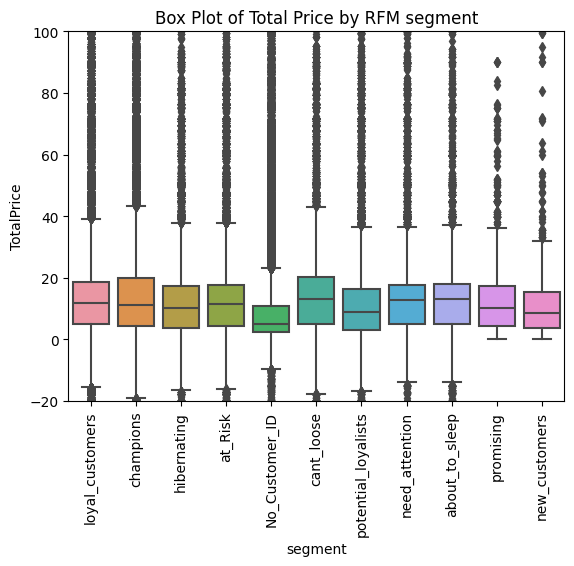

In [42]:
sns.boxplot(x='segment', y='TotalPrice',data=data_rfm)
plt.ylim(-20, 100)
plt.title("Box Plot of Total Price by RFM segment")
plt.xticks(rotation=90)
plt.show()

Whilst segmentation is useful, the boxplot above shows us a limitation- it does not help us identify which types of customers make the largest orders at once. We can try other forms of clustering to try get a greater insight into these customers

# Clustering attempt

Now, we can use clustering to see if we can enhance customer segmentation

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
## Impport PCA package
from sklearn.decomposition import PCA
## Import KElbowVisualizer and Kmeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [44]:
## We will only focus on a few features to help the clustering behave most efficiently
features = ['TotalPrice', 'segment']

I found outliers to be particularly troublesome, to the code below gets rid of them

In [45]:
# Removing outliers from TotalPrice
Q1 = data_rfm.TotalPrice.quantile(0.05)
Q3 = data_rfm.TotalPrice.quantile(0.95)
IQR = Q3 - Q1
data_rfm = data_rfm[(data_rfm.TotalPrice >= Q1-1.5*IQR) & (data_rfm.TotalPrice <= Q3 + 1.5*IQR)]

In [46]:
X = data_rfm[features]

In [47]:
print(X.shape)
X.head()

(1043543, 2)


,TotalPrice,segment
0,83.4,loyal_customers
1,81.0,loyal_customers
2,81.0,loyal_customers
3,100.8,loyal_customers
4,30.0,loyal_customers


In [48]:
## Do label encoding on the 'segment' column to alllow K-means to work
le = LabelEncoder()
X['segment'] = le.fit_transform(X['segment'])

C:\Users\ksbha\AppData\Local\Temp\ipykernel_2464\448666045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['segment'] = le.fit_transform(X['segment'])


In [49]:
## Scaling is important to make sure that no single feature (or group of features) dominate
scaler = StandardScaler()
retail_scaled = scaler.fit_transform(X)

d:\Users\ksbha\miniconda3\envs\footy\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Users\ksbha\miniconda3\envs\footy\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Users\ksbha\miniconda3\envs\footy\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Users\ksbha\miniconda3\envs\footy\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will c

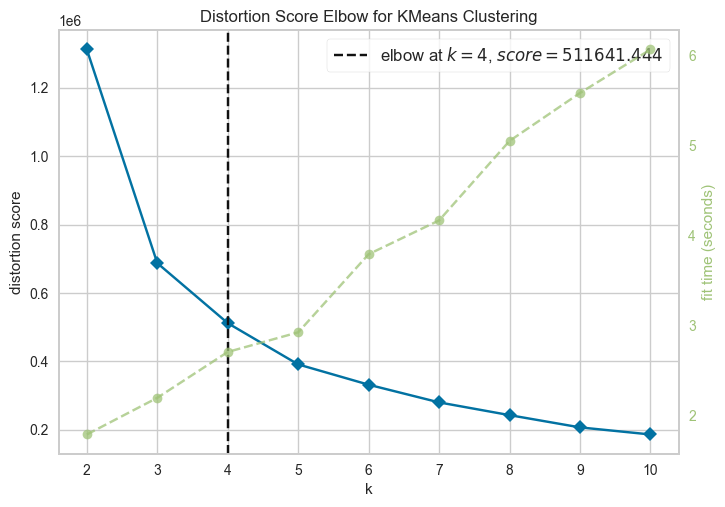

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
#elbow viz for number of k's
elbow_method = KElbowVisualizer(KMeans(random_state=42), k = 10)
elbow_method.fit(retail_scaled)
elbow_method.show()

In [51]:
kmeans = KMeans(n_clusters = 4, random_state=42)
kmeans_pred = kmeans.fit_predict(retail_scaled)

d:\Users\ksbha\miniconda3\envs\footy\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


We are focussing solely on customers here, so customers with No ID cannot be segmented with any great confidence, and they are therefore removed

In [52]:
## Change retail_scaled into a Dataframe
retail_scaled = pd.DataFrame(retail_scaled, columns=features)

In [53]:
data_rfm['Cluster']= kmeans_pred 
retail_scaled['Cluster'] = kmeans_pred

<Axes: xlabel='Cluster', ylabel='TotalPrice'>

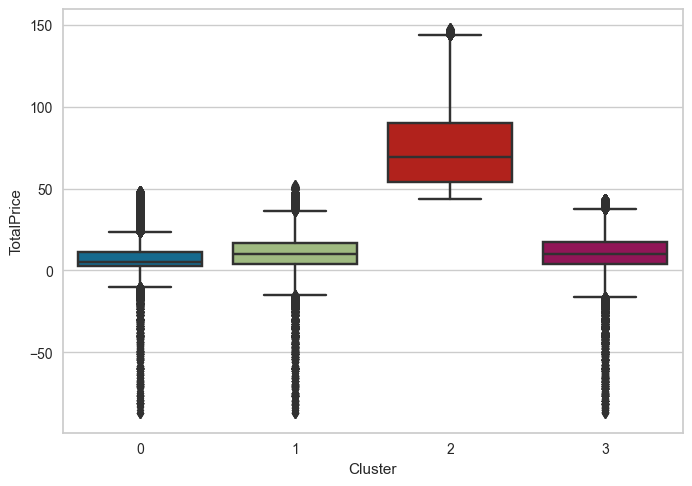

In [54]:
sns.boxplot(x='Cluster', y='TotalPrice',data=data_rfm)

As shown in the plots above, we now have a cluster that identifies a group of customers that tend to spend more money on their individual transactions that other customer clusters. 
This can help the necessary stakeholders determine which customers they should target.

# CLTV calculations

For the forecasting element of this project, we can start with Customer Lifetime Value (CLTV) calculations. This will help us determine how much revenue a customer will generate for the company over their lifetime

In [55]:
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from sklearn.preprocessing import MinMaxScaler

In [56]:
## Make a copy of our original dataframe, and drop all rows with NaN values
df = data.copy()
# df.dropna(inplace=True)

In [57]:
## For this examplle, we 
# df = df[~df["Invoice"].astype('str').str.contains("C", na=False)] 

In [58]:
cltv_df = df.groupby('Customer ID').agg({'InvoiceDate': [lambda date: (date.max() - date.min()).days,
                                                         lambda date: (today_date - date.min()).days],
                                         'Invoice': lambda num: num.nunique(),
                                         'TotalPrice': lambda TotalPrice: TotalPrice.sum()})
cltv_df.columns = ['recency', 'T', 'frequency', 'monetary']

We don't use the RFM dataframe because we want to use the "T" function, which is the "age" of the customer i.e. how long they have been a customer for from today

In [59]:
## We find the rate of purchase for each customer, focussing on those with a positive rate. 
cltv_df["mon/freq"] = cltv_df["monetary"] / cltv_df["frequency"]
cltv_df = cltv_df[cltv_df["mon/freq"] > 0]

In [60]:
# cltv_df["recency"] = cltv_df["recency"] / 7
# cltv_df["T"] = cltv_df["T"] / 7

In [61]:
cltv_df = cltv_df[(cltv_df['frequency'] > 1)]

The BetaGeoFitter model assumes that the number of transactions made by a customer follows a Negative Binomial Distribution. It is used to predict the purchasing behavior of customers over time.

In [62]:
bgf = BetaGeoFitter(penalizer_coef=0.001)

bgf.fit(cltv_df['frequency'],
        cltv_df['recency'],
        cltv_df['T'])

<lifetimes.BetaGeoFitter: fitted with 4438 subjects, a: 0.27, alpha: 56.16, b: 3.25, r: 1.56>

The Gamma-Gamma model is used to predict the monetary value of customer transactions. The model assumes that the monetary value of a customer’s transactions is independent of the transaction process.

In [63]:
ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(cltv_df['frequency'], cltv_df['monetary'])

<lifetimes.GammaGammaFitter: fitted with 4438 subjects, p: 1.75, q: 0.19, v: 2.96>

We can use the two models in conjunction to calcualte the CLTV of each customer across a 6-month period at a weekly frequency

In [64]:
cltv = ggf.customer_lifetime_value(bgf,
                                   cltv_df['frequency'],
                                   cltv_df['recency'],
                                   cltv_df['T'],
                                   cltv_df['monetary'],
                                   time=6,
                                   freq="W",  
                                   discount_rate=0.01)

In [65]:
cltv = cltv.reset_index()
cltv.columns = ["Customer ID", "clv"]
cltv.sort_values(by="clv", ascending=False).head(50)
cltv_final = cltv_df.merge(cltv, on="Customer ID", how="left")

In [66]:
cltv_final.sort_values(by="clv", ascending=False).head(10)

,Customer ID,recency,T,frequency,monetary,mon/freq,clv
1926,14911.0,737,739,506,269685.17,532.974644,4.312166e+06
4308,18102.0,738,739,153,598215.22,3909.903399,2.918452e+06
1729,14646.0,735,738,163,523342.07,3210.687546,2.718756e+06
1358,14156.0,728,739,196,296025.40,1510.333673,1.810374e+06
1004,13694.0,731,736,164,190825.52,1163.570244,9.982887e+05
2229,15311.0,738,739,270,113513.07,420.418778,9.723799e+05
554,13089.0,734,738,247,113214.19,458.357045,8.868327e+05
3836,17450.0,429,439,61,233579.39,3829.170328,7.327608e+05
4137,17841.0,735,738,289,69516.19,240.540450,6.370091e+05
2037,15061.0,734,739,138,136391.48,988.344058,5.995280e+05


In [67]:
# Standardization of CLTV
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(cltv_final[["clv"]])
cltv_final["scaled_clv"] = scaler.transform(cltv_final[["clv"]])

In [68]:
## Add "segment" column to cltv_final to see which segments are most valuable
cltv_final = cltv_final.merge(rfm[["segment"]], how='left', on='Customer ID')

In [69]:
cltv_final.sort_values(by="scaled_clv", ascending=False).head(10)

,Customer ID,recency,T,frequency,monetary,mon/freq,clv,scaled_clv,segment
1926,14911.0,737,739,506,269685.17,532.974644,4.312166e+06,1.000000,champions
4308,18102.0,738,739,153,598215.22,3909.903399,2.918452e+06,0.676795,champions
1729,14646.0,735,738,163,523342.07,3210.687546,2.718756e+06,0.630485,champions
1358,14156.0,728,739,196,296025.40,1510.333673,1.810374e+06,0.419829,champions
1004,13694.0,731,736,164,190825.52,1163.570244,9.982887e+05,0.231505,champions
2229,15311.0,738,739,270,113513.07,420.418778,9.723799e+05,0.225497,champions
554,13089.0,734,738,247,113214.19,458.357045,8.868327e+05,0.205658,champions
3836,17450.0,429,439,61,233579.39,3829.170328,7.327608e+05,0.169929,champions
4137,17841.0,735,738,289,69516.19,240.540450,6.370091e+05,0.147724,champions
2037,15061.0,734,739,138,136391.48,988.344058,5.995280e+05,0.139032,champions


As expected, champions are the most valuable customers. This is because they have the highest frequency and monetary values

## Perform ARIMA on the one of the clusters:

I'll perform ARIMA on the cluster with the highest Total Price to try and forecast on time-sereis data.

In particular, I am using seasonal ARIMA to account for the seasonality in the data, and forecast projections for the next year on a monthly and weekly frequency.

In [70]:
import statsmodels.api as sm

In [71]:
data_rfm.groupby('Cluster').agg({
    'TotalPrice': ['sum', 'mean', 'count','median'],
})

TotalPrice                          
                 sum       mean   count median
Cluster                                       
0        2253532.992   7.948662  283511    5.1
1        3561976.186  11.722117  303868   10.2
2        4122431.490  76.031566   54220   69.6
3        4702259.489  11.698793  401944   10.2

As shown above, Cluster 4, on average, generates the most revenue. We will use this cluster to forecast CLTV

In [72]:
cluster_group = data_rfm.groupby('Cluster').agg({
    'TotalPrice': ['mean', 'median'],
})

In [73]:
## Find cluster with highest media in cluster_group
cluster_max = cluster_group[cluster_group['TotalPrice']['median'] == cluster_group['TotalPrice']['median'].max()].index

In [74]:
cluster_max[0]

2

In [75]:
Cluster_oi = data_rfm[data_rfm.Cluster == cluster_max[0]]

In [76]:
Cluster_oi.set_index('InvoiceDate', inplace=True)

We can segregate our data into monthly allocations, and plot the graph shown below:

In [77]:
monthly_sales = Cluster_oi['TotalPrice'].resample('M').sum()
weekly_sales = Cluster_oi['TotalPrice'].resample('W').sum()

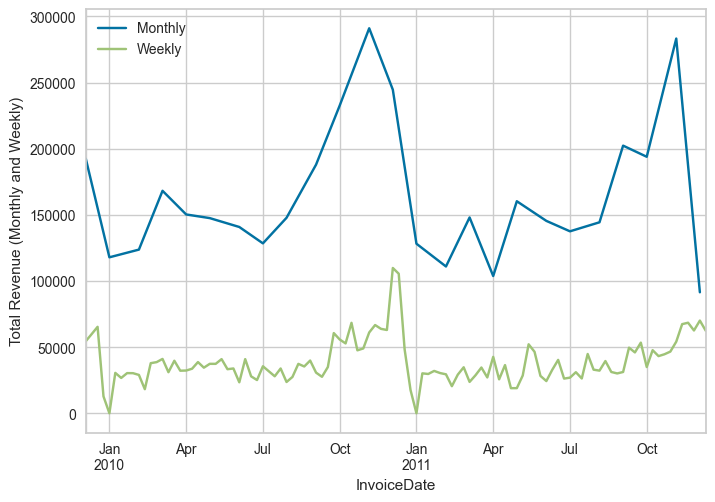

In [78]:
monthly_sales.plot()
weekly_sales.plot()
plt.ylabel('Total Revenue (Monthly and Weekly)')
plt.legend(['Monthly', 'Weekly'])
plt.show()

Now, we can perform a manual parameter search to find the best parameters for our Seasonal ARIMA model (p, d and q parameters), as well as the seasonal parameters (P, D and Q), and the seasonal period (S).

At first, we will focus on a monthly frequency.

In [79]:
import statsmodels.api as sm
import itertools
import warnings
warnings.filterwarnings('ignore')

# p, d, q and seasonal p, d, q parameters to take any value between 0 and 2
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

lowest_aic = np.inf
best_pdq = None
best_seasonal_pdq = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            sarima_model = sm.tsa.SARIMAX(monthly_sales,
                                          order=param,
                                          seasonal_order=param_seasonal,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
            results = sarima_model.fit()
            if results.aic < lowest_aic:
                lowest_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue

print('Best SARIMA model:', best_pdq, best_seasonal_pdq, 'AIC:', lowest_aic)


Best SARIMA model: (0, 0, 0) (0, 2, 0, 12) AIC: 2.0


In [80]:
sarima_model = sm.tsa.SARIMAX(monthly_sales,
                              order=(0, 0, 0),
                              seasonal_order=(0, 2, 0, 12),
                              enforce_stationarity=False,
                              enforce_invertibility=False)

results = sarima_model.fit()

In [81]:
forecast = results.get_forecast(steps=12)  # Forecast the next 12 months
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

In [82]:
forecast_estimate = forecast_mean

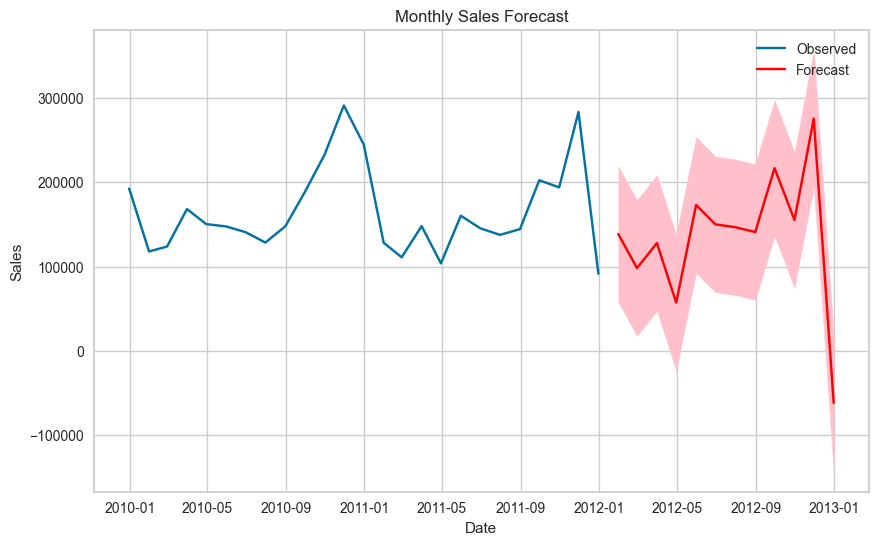

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Observed')
plt.plot(forecast_estimate.index, forecast_estimate, color='red', label='Forecast')
plt.fill_between(forecast_conf_int.index, 
                 forecast_conf_int.iloc[:, 0], 
                 forecast_conf_int.iloc[:, 1], color='pink')
plt.title('Monthly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

As seen above, the forecast is able to account for the seasonality, especially the Christmas season. However, it is not able to capture January, so this last data point can be ignored

In [84]:
import warnings
warnings.filterwarnings('ignore')

# The p, d, q and seasonal p, d, q parameters can take any value between 0 and 2
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in pdq]

lowest_aic = np.inf
best_pdq = None
best_seasonal_pdq = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            sarima_model = sm.tsa.SARIMAX(weekly_sales[1:-1],
                                          order=param,
                                          seasonal_order=param_seasonal,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
            results = sarima_model.fit()
            if results.aic < lowest_aic:
                lowest_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue

print('Best SARIMA model:', best_pdq, best_seasonal_pdq, 'AIC:', lowest_aic)


Best SARIMA model: (0, 0, 0) (0, 2, 0, 52) AIC: 2.0


In [85]:
sarima_model = sm.tsa.SARIMAX(weekly_sales,
                              order=(0, 0, 0),
                              seasonal_order=(0, 2, 0, 52),
                              enforce_stationarity=False,
                              enforce_invertibility=False)

results = sarima_model.fit()

In [86]:
forecast = results.get_forecast(steps=52)  # Forecast the next 12 months
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

In [87]:
forecast_estimate = forecast_mean

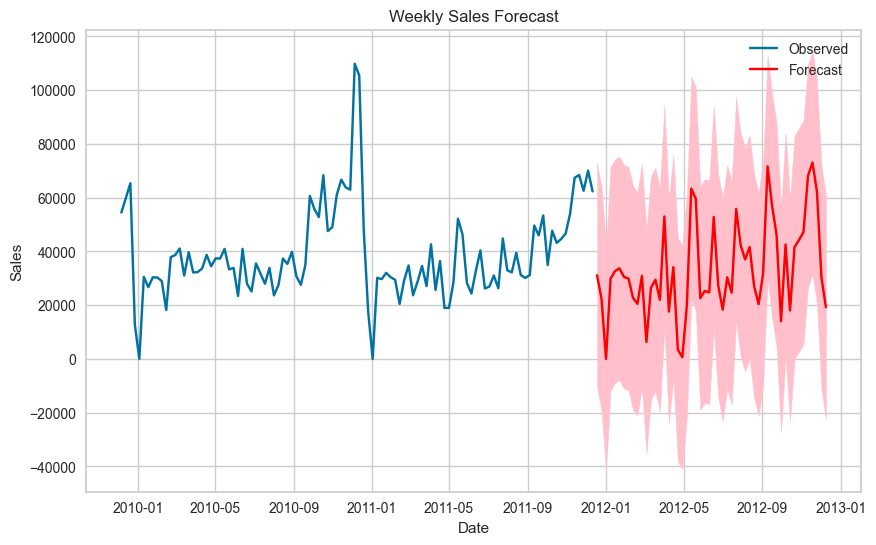

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales.index, weekly_sales, label='Observed')
plt.plot(forecast_estimate.index, forecast_estimate, color='red', label='Forecast')
plt.fill_between(forecast_conf_int.index, 
                 forecast_conf_int.iloc[:, 0], 
                 forecast_conf_int.iloc[:, 1], color='pink')
plt.title('Weekly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

The weekly model seems to form a decent estimation of the trend expected

#### Further considerations:
- See what enhanceents product clustering or categorization can bring in terms of enhanced customer segmentation